In [1]:
import pandas as pd

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "/System/Library/Fonts/AppleSDGothicNeo.ttc").get_name()
rc('font', family = font_name)

# 지역별로 DataFrame 만들기

In [6]:
# 전체 데이터를 DataFrame으로 읽기
csv_file = 'csv_data/tokens_region_dummies.csv'
data = pd.read_csv(csv_file)

# 각 지역별로 데이터 필터링
gangwon = data[data['Region_강원'] == True][['Eojeol', 'Standard', 'IsDialect']].reset_index(drop=True)
chungcheong = data[data['Region_충청'] == True][['Eojeol', 'Standard', 'IsDialect']].reset_index(drop=True)
gyeongsang = data[data['Region_경상'] == True][['Eojeol', 'Standard', 'IsDialect']].reset_index(drop=True)
jeolla = data[data['Region_전라'] == True][['Eojeol', 'Standard', 'IsDialect']].reset_index(drop=True)
jeju = data[data['Region_제주'] == True][['Eojeol', 'Standard', 'IsDialect']].reset_index(drop=True)

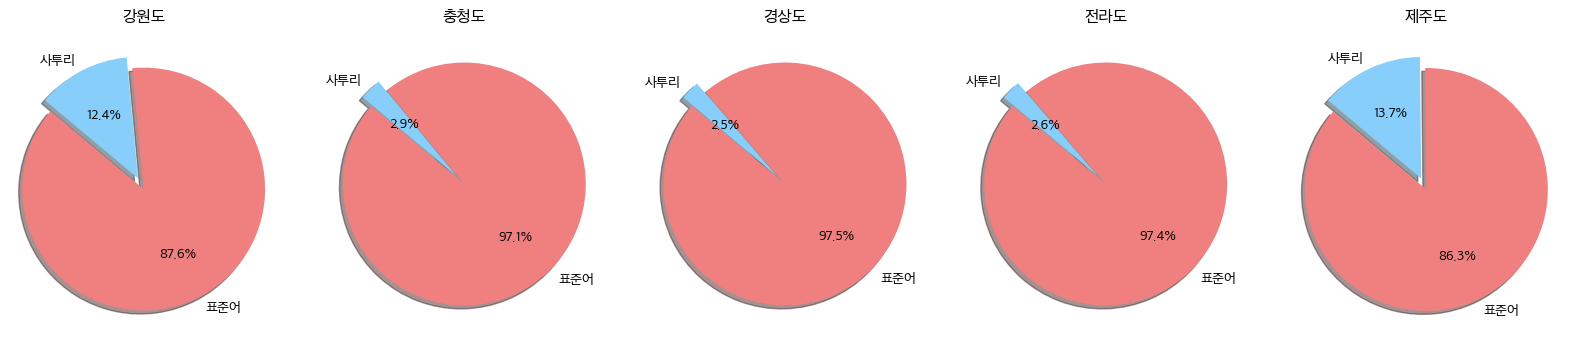

In [14]:
# 각 지역별 IsDialect 비율 계산
# 각 지역 DataFrame의 IsDialect 컬럼을 사용하여 비율을 계산한다.
# 각 지역별 IsDialect=1의 비율을 계산한다.

gangwon_isdialect = gangwon['IsDialect'].mean() * 100
chungcheong_isdialect = chungcheong['IsDialect'].mean() * 100
gyeongsang_isdialect = gyeongsang['IsDialect'].mean() * 100
jeolla_isdialect = jeolla['IsDialect'].mean() * 100
jeju_isdialect = jeju['IsDialect'].mean() * 100

# 파이 차트 설정
labels = ['표준어', '사투리']
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)

# 서브플롯 설정
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # 1행 5열 서브플롯

# 강원 지역 파이 차트
axs[0].pie([100 - gangwon_isdialect, gangwon_isdialect], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('강원도')
axs[0].axis('equal')

# 충청 지역 파이 차트
axs[1].pie([100 - chungcheong_isdialect, chungcheong_isdialect], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('충청도')
axs[1].axis('equal')

# 경상 지역 파이 차트
axs[2].pie([100 - gyeongsang_isdialect, gyeongsang_isdialect], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[2].set_title('경상도')
axs[2].axis('equal')

# 전라 지역 파이 차트
axs[3].pie([100 - jeolla_isdialect, jeolla_isdialect], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[3].set_title('전라도')
axs[3].axis('equal')

# 제주 지역 파이 차트
axs[4].pie([100 - jeju_isdialect, jeju_isdialect], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[4].set_title('제주도')
axs[4].axis('equal')

# 전체 그래프 보여주기
plt.show()

## 사투리의 비율이 높은 지역은 제주도, 강원도, 충청도, 경상도, 전라도 순이다.
## 강원도와 제주도의 사투리 비율이 높은 것은 지역적으로 고립된 특성에서 비롯된 것 같다.

# 지역별 WordCloud 분석

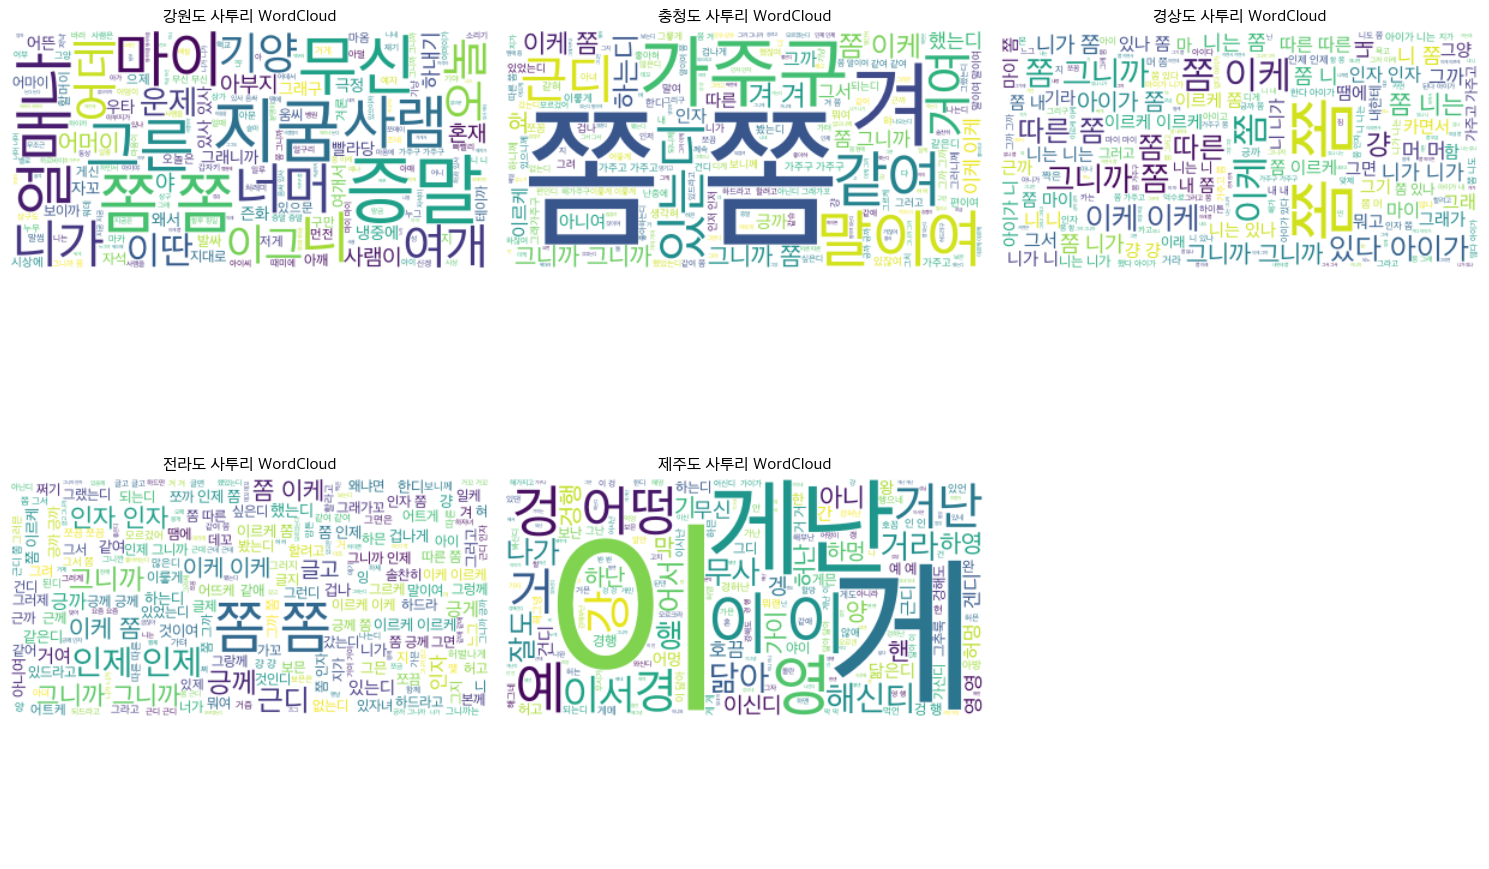

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 각 지역별 사투리 데이터 필터링 및 텍스트 추출
dialect_gangwon = ' '.join(gangwon[gangwon['IsDialect'] == 1].dropna(subset=['Eojeol'])['Eojeol'])
dialect_chungcheong = ' '.join(chungcheong[chungcheong['IsDialect'] == 1].dropna(subset=['Eojeol'])['Eojeol'])
dialect_gyeongsang = ' '.join(gyeongsang[gyeongsang['IsDialect'] == 1].dropna(subset=['Eojeol'])['Eojeol'])
dialect_jeolla = ' '.join(jeolla[jeolla['IsDialect'] == 1].dropna(subset=['Eojeol'])['Eojeol'])
dialect_jeju = ' '.join(jeju[jeju['IsDialect'] == 1].dropna(subset=['Eojeol'])['Eojeol'])

# 서브플롯 설정
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2행 3열 서브플롯

# WordCloud 설정
wc_config = {"font_path":"/System/Library/Fonts/AppleSDGothicNeo.ttc", "background_color":'white'}

# 강원 지역 사투리 WordCloud
gangwon_wordcloud = WordCloud(**wc_config).generate(dialect_gangwon)
axs[0, 0].imshow(gangwon_wordcloud, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('강원도 사투리 WordCloud')

# 충청 지역 사투리 WordCloud
chungcheong_wordcloud = WordCloud(**wc_config).generate(dialect_chungcheong)
axs[0, 1].imshow(chungcheong_wordcloud, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('충청도 사투리 WordCloud')

# 경상 지역 사투리 WordCloud
gyeongsang_wordcloud = WordCloud(**wc_config).generate(dialect_gyeongsang)
axs[0, 2].imshow(gyeongsang_wordcloud, interpolation='bilinear')
axs[0, 2].axis('off')
axs[0, 2].set_title('경상도 사투리 WordCloud')

# 전라 지역 사투리 WordCloud
jeolla_wordcloud = WordCloud(**wc_config).generate(dialect_jeolla)
axs[1, 0].imshow(jeolla_wordcloud, interpolation='bilinear')
axs[1, 0].axis('off')
axs[1, 0].set_title('전라도 사투리 WordCloud')

# 제주 지역 사투리 WordCloud
jeju_wordcloud = WordCloud(**wc_config).generate(dialect_jeju)
axs[1, 1].imshow(jeju_wordcloud, interpolation='bilinear')
axs[1, 1].axis('off')
axs[1, 1].set_title('제주도 사투리 WordCloud')

# 나머지 서브플롯 비우기
axs[1, 2].axis('off')

# 전체 그래프 보여주기
plt.tight_layout()
plt.show()


### 표준어 버전

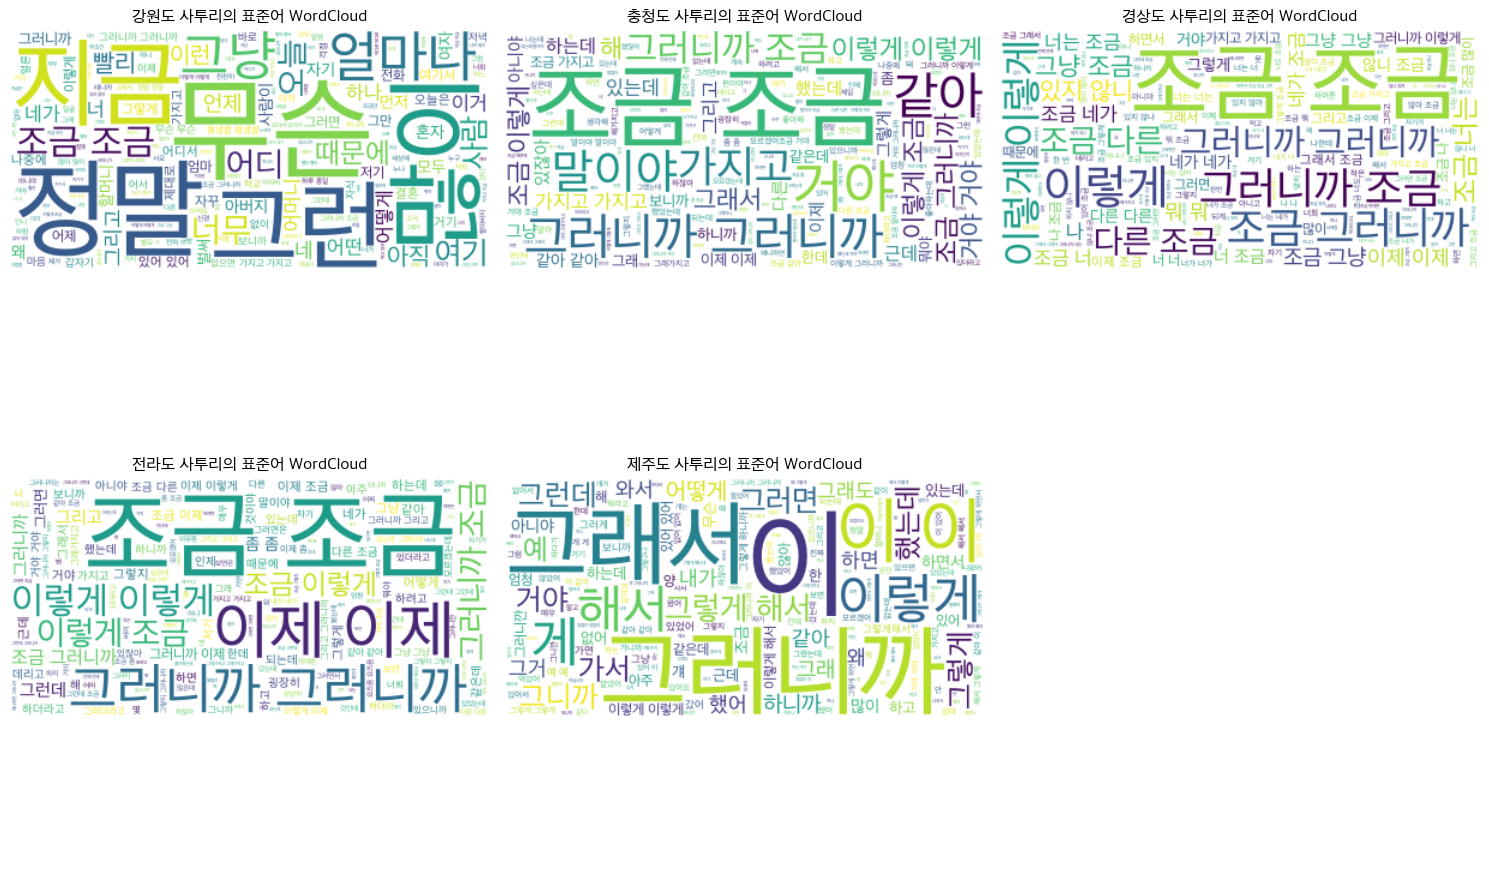

In [22]:
# 각 지역별로 IsDialect가 1인 표준어 텍스트 생성
text_standard_dialect_gangwon = ' '.join(gangwon[gangwon['IsDialect'] == 1]['Standard'].dropna())
text_standard_dialect_chungcheong = ' '.join(chungcheong[chungcheong['IsDialect'] == 1]['Standard'].dropna())
text_standard_dialect_gyeongsang = ' '.join(gyeongsang[gyeongsang['IsDialect'] == 1]['Standard'].dropna())
text_standard_dialect_jeolla = ' '.join(jeolla[jeolla['IsDialect'] == 1]['Standard'].dropna())
text_standard_dialect_jeju = ' '.join(jeju[jeju['IsDialect'] == 1]['Standard'].dropna())

# 서브플롯 설정
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2행 3열 서브플롯

# WordCloud 설정
wc_config = {"font_path":"/System/Library/Fonts/AppleSDGothicNeo.ttc", "background_color":'white'}

# 강원 지역 사투리 표준어 WordCloud
gangwon_wordcloud = WordCloud(**wc_config).generate(text_standard_dialect_gangwon)
axs[0, 0].imshow(gangwon_wordcloud, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('강원도 사투리의 표준어 WordCloud')

# 충청 지역 사투리 표준어 WordCloud
chungcheong_wordcloud = WordCloud(**wc_config).generate(text_standard_dialect_chungcheong)
axs[0, 1].imshow(chungcheong_wordcloud, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('충청도 사투리의 표준어 WordCloud')

# 경상 지역 사투리 표준어 WordCloud
gyeongsang_wordcloud = WordCloud(**wc_config).generate(text_standard_dialect_gyeongsang)
axs[0, 2].imshow(gyeongsang_wordcloud, interpolation='bilinear')
axs[0, 2].axis('off')
axs[0, 2].set_title('경상도 사투리의 표준어 WordCloud')

# 전라 지역 사투리 표준어 WordCloud
jeolla_wordcloud = WordCloud(**wc_config).generate(text_standard_dialect_jeolla)
axs[1, 0].imshow(jeolla_wordcloud, interpolation='bilinear')
axs[1, 0].axis('off')
axs[1, 0].set_title('전라도 사투리의 표준어 WordCloud')

# 제주 지역 사투리 표준어 WordCloud
jeju_wordcloud = WordCloud(**wc_config).generate(text_standard_dialect_jeju)
axs[1, 1].imshow(jeju_wordcloud, interpolation='bilinear')
axs[1, 1].axis('off')
axs[1, 1].set_title('제주도 사투리의 표준어 WordCloud')

# 나머지 서브플롯 비우기
axs[1, 2].axis('off')

# 전체 그래프 보여주기
plt.tight_layout()
plt.show()


## 중복된 단어가 많아 보인다. unique한 단어만 추출하여 WordCloud를 그려보자.

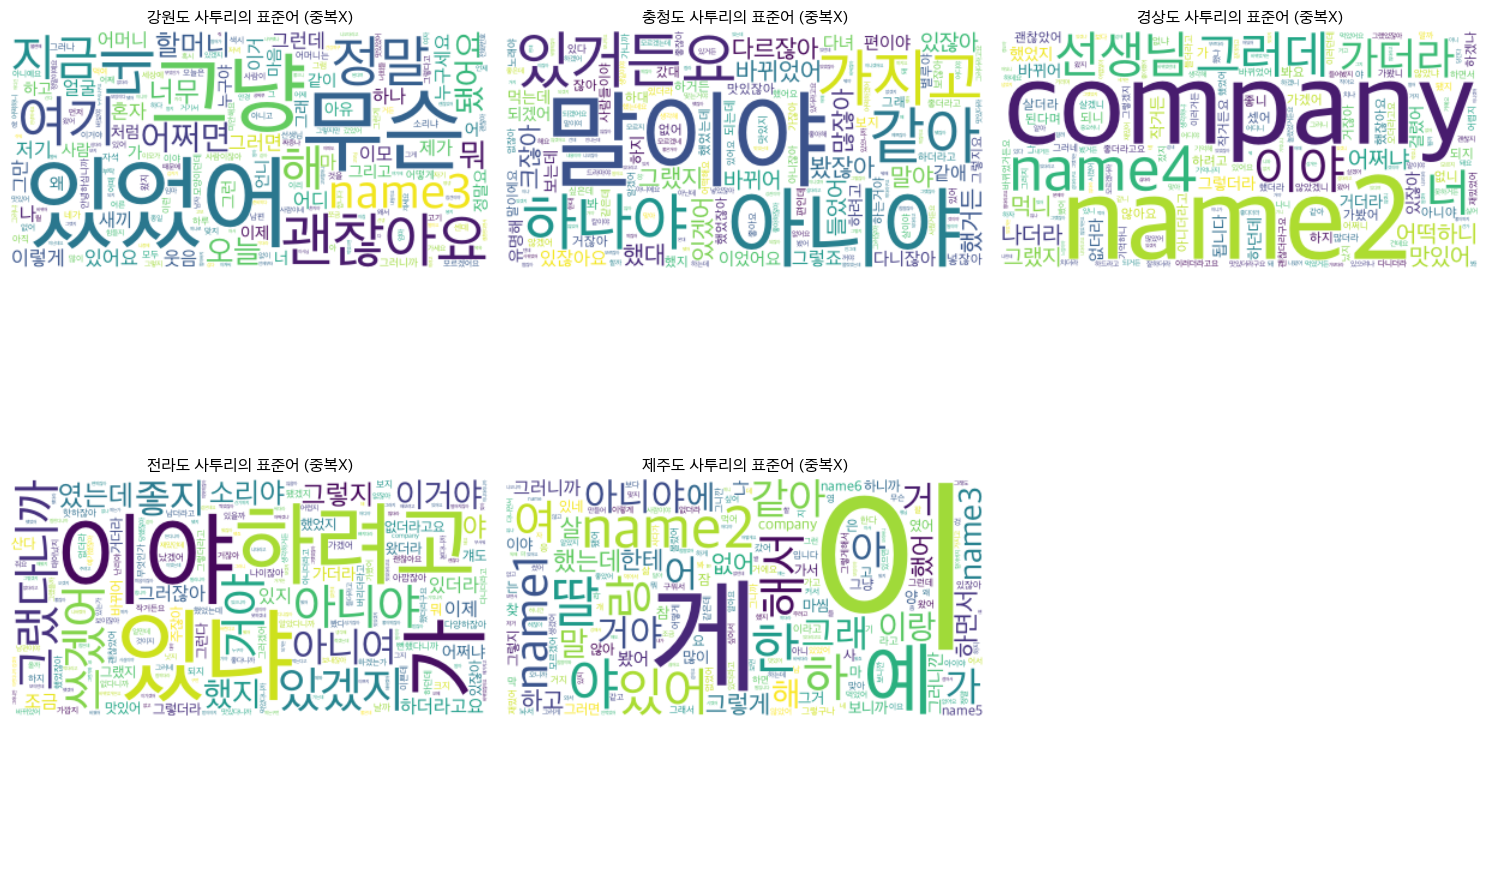

In [24]:
# 각 지역별 사투리 데이터 필터링 및 고유 표준어 추출
unique_dialect_gangwon = set(' '.join(gangwon[gangwon['IsDialect'] == 1].dropna(subset=['Standard'])['Standard']).split())
unique_dialect_chungcheong = set(' '.join(chungcheong[chungcheong['IsDialect'] == 1].dropna(subset=['Standard'])['Standard']).split())
unique_dialect_gyeongsang = set(' '.join(gyeongsang[gyeongsang['IsDialect'] == 1].dropna(subset=['Standard'])['Standard']).split())
unique_dialect_jeolla = set(' '.join(jeolla[jeolla['IsDialect'] == 1].dropna(subset=['Standard'])['Standard']).split())
unique_dialect_jeju = set(' '.join(jeju[jeju['IsDialect'] == 1].dropna(subset=['Standard'])['Standard']).split())

# 각 지역별 고유 단어를 문자열로 변환
text_dialect_gangwon = ' '.join(unique_dialect_gangwon)
text_dialect_chungcheong = ' '.join(unique_dialect_chungcheong)
text_dialect_gyeongsang = ' '.join(unique_dialect_gyeongsang)
text_dialect_jeolla = ' '.join(unique_dialect_jeolla)
text_dialect_jeju = ' '.join(unique_dialect_jeju)

# 서브플롯 설정 (2행 3열에서 마지막 하나는 비워두기)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# WordCloud 설정
wc_config = {"font_path":"/System/Library/Fonts/AppleSDGothicNeo.ttc", "background_color":'white'}

# 강원 지역 사투리 표준어 WordCloud
gangwon_wordcloud = WordCloud(**wc_config).generate(text_dialect_gangwon)
axs[0, 0].imshow(gangwon_wordcloud, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('강원도 사투리의 표준어 (중복X)')

# 충청 지역 사투리 표준어 WordCloud
chungcheong_wordcloud = WordCloud(**wc_config).generate(text_dialect_chungcheong)
axs[0, 1].imshow(chungcheong_wordcloud, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('충청도 사투리의 표준어 (중복X)')

# 경상 지역 사투리 표준어 WordCloud
gyeongsang_wordcloud = WordCloud(**wc_config).generate(text_dialect_gyeongsang)
axs[0, 2].imshow(gyeongsang_wordcloud, interpolation='bilinear')
axs[0, 2].axis('off')
axs[0, 2].set_title('경상도 사투리의 표준어 (중복X)')

# 전라 지역 사투리 표준어 WordCloud
jeolla_wordcloud = WordCloud(**wc_config).generate(text_dialect_jeolla)
axs[1, 0].imshow(jeolla_wordcloud, interpolation='bilinear')
axs[1, 0].axis('off')
axs[1, 0].set_title('전라도 사투리의 표준어 (중복X)')

# 제주 지역 사투리 표준어 WordCloud
jeju_wordcloud = WordCloud(**wc_config).generate(text_dialect_jeju)
axs[1, 1].imshow(jeju_wordcloud, interpolation='bilinear')
axs[1, 1].axis('off')
axs[1, 1].set_title('제주도 사투리의 표준어 (중복X)')

# 나머지 서브플롯 비우기
axs[1, 2].axis('off')

# 전체 그래프 보여주기
plt.tight_layout()
plt.show()


- 일부 이상한 데이터가 보인다... 나머지는 내일 계속